In [136]:
from sympy import  symbols, Integer, Rational, simplify, collect, expand

In [168]:
def coll(expr, N0):
    return simplify(collect(expand(expr), N0))

def build_N0(U):
    return [
        Integer(0) if U[i] == U[i+1] else symbols('N_0_'+str(i))
            for i in range(len(U)-1)] + [Integer(0)]

def non_zero_N0(N0):
    return [n for n in N0 if n != Integer(0)]

def BSplineBasis(i,p,U,N0):
    if p == 0:
        if i+1 >= len(U):
            return Integer(0)
        else:
            return N0[i]
    else:
        c1 = Integer(0)
        c2 = Integer(0)
        if i+p < len(U) and U[i+p] != U[i]:
            c1 = (symbols('u') - U[i])/(U[i+p] - U[i])
        if i+p+1 < len(U) and U[i+p+1] != U[i+1]:
            c2 = (U[i+p+1] - symbols('u'))/(U[i+p+1] - U[i+1])
        return simplify(c1*BSplineBasis(i,p-1,U,N0) + c2*BSplineBasis(i+1,p-1,U,N0))

In [169]:
U = [Integer(0),Integer(0),
     Integer(0),Rational(1/2),Integer(1),
     Integer(1),Integer(1)]
N0 = build_N0(U)
UN = non_zero_N0(N0)

In [180]:
print([coll(BSplineBasis(i,0,U,N0), UN) for i in range(len(U)-1)])

[0, 0, N_0_2, N_0_3, 0, 0]


In [178]:
[coll(BSplineBasis(i,1,U,N0), UN) for i in range(len(U)-1)]

[0, N_0_2*(1 - 2*u), 2*N_0_2*u - 2*N_0_3*(u - 1), N_0_3*(2*u - 1), 0, 0]

In [179]:
[coll(BSplineBasis(i,2,U,N0), UN) for i in range(len(U)-1)]

[N_0_2*(4*u**2 - 4*u + 1),
 -2*N_0_2*u*(3*u - 2) + 2*N_0_3*(u**2 - 2*u + 1),
 2*N_0_2*u**2 - 2*N_0_3*(3*u**2 - 4*u + 1),
 N_0_3*(4*u**2 - 4*u + 1),
 0,
 0]

In [181]:
import matplotlib.pyplot as plt

In [192]:
def N02(u):
    return (2*u-1)**2 if 0 <= u < 0.5 else 0.0

def N12(u):
    return -2*u*(3*u-2) if 0 <= u < 0.5 else (2*(u-1)**2 if 0.5 <= u <= 1 else 0.0)

def N22(u):
    return 2*u**2 if 0 <= u < 0.5 else (-2*(3*u**2-4*u+1) if 0.5 <= u <= 1.0 else 0.0)

def N32(u):
    return (2*u-1)**2 if 0.5 <= u <= 1.0 else 0.0

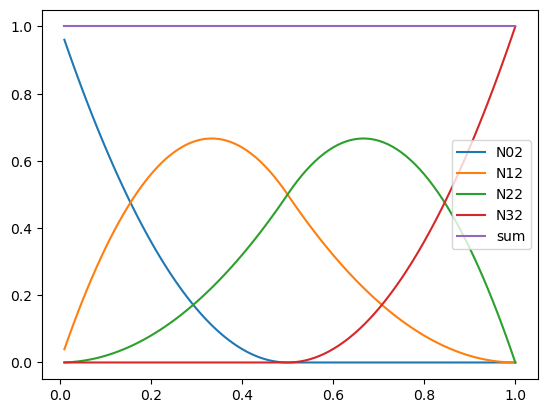

In [198]:
uL = [i/100.0 for i in range(1,101)]
N0L = [N02(u) for u in uL]
N1L = [N12(u) for u in uL]
N2L = [N22(u) for u in uL]
N3L = [N32(u) for u in uL]
NL = [N02(u)+N12(u)+N22(u)+N32(u) for u in uL]
plt.plot(uL, N0L, label='N02')
plt.plot(uL, N1L, label='N12')
plt.plot(uL, N2L, label='N22')
plt.plot(uL, N3L, label='N32')
plt.plot(uL, NL, label='sum')
plt.legend()
plt.savefig('BSplineBasis.png')

In [197]:
uL = [i/100.0 for i in range(1,101)]
NL = [N02(u)+N12(u)+N22(u)+N32(u) for u in uL]
NL

[0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 0.9999999999999998,
 0.9999999999999999,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 1.0000000000000002,
 0.9999999999999999,
 1.0000000000000002,
 0.9999999999999999,
 0.9999999999999999,
 1.0000000000000002,
 0.9999999999999998,
 1.0000000000000002,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 1.0,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 1.0000000000000002,
 1.0,
 0.9999999999999998,
 1.0,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 0.9999999999999998,
 1.0